<a href="https://colab.research.google.com/github/InduwaraRathnayake/In22-S4-CS3111-Intro-to-ML/blob/week3/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Selection


This notebook explores various feature selection techniques applied to the Pima Indians Diabetes dataset.

*We will use `filter`, `wrapper`, and `embedded methods` to identify the most relevant features for predicting diabetes.*

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Load the Pima Indians Diabetes dataset from a URL
data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
features = ["preg", "plas", "pres", "skin", "test", "mass", "pedi", "age", "class"]

df = pd.read_csv(data, names=features) # Create a Pandas DataFrame
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape  # Display the shape (rows, columns) of the DataFrame

(768, 9)

In [ ]:
data = df.values # Convert the DataFrame to a NumPy array
data

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

**Separate features (X) and target variable (Y)**

In [ ]:
X = data[:, 0 : 8] # Features are in columns 0 to 7
Y = data[:, 8] # Target variable is in column 8

print(f"X: {X}")
print(f"Y: {Y}")


X: [[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
Y: [1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 

## 1. Filter method

This section demonstrates feature selection using the filter method, specifically the chi-squared test.

We will select the top 4 features based on their chi-squared scores.

In [ ]:
# Import necessary libraries for filter method
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# Initialize SelectKBest with chi2 scoring function and k=4 (selecting 4 features)
chi_best = SelectKBest(score_func=chi2, k=4)
k_best = chi_best.fit(X, Y)

# Print chi-squared scores for each feature
np.set_printoptions(precision=3)
print(k_best.scores_)

# Transform the data to select the top k features
k_feature = k_best.transform(X)
print(k_feature[0:5, :])

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


## 2. Wrapped Method

In [ ]:
# Import necessary libraries for wrapped method
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Initialize Logistic Regression model and RFE with n_features_to_select=3
model_lr = LogisticRegression()
recur_fe = RFE(estimator=model_lr, n_features_to_select=3)  # Named argument
feature = recur_fe.fit(X, Y)

# Print results
print(f"Number of Features: {feature.n_features_}")
print(f"Selected Features: {feature.support_}")
print(f"Feature ranking is following  : {feature.ranking_}")


Number of Features: 3
Selected Features: [ True False False False False  True  True False]
Feature ranking is following  : [1 2 4 5 6 1 1 3]


## 3. Embedded Method


**Ridge regression/ L2 Regularization**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# Initialize Ridge Regression model with alpha=1.0
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X,Y)

Ridge()

In [ ]:
def print_coefs(coef, name=None, sort=False):
  """
  Define a function to print coefficients
  """
  if name==None:
    names = ["X%s" % x for x in range(len(coef))]

  lst = zip(coef, names)
  if sort:
    lst = sorted(lst, key = lambda x: np.abs(x[0]))

  return " + " .join("%s * %s" % (round(coefs,3), name) for coefs, name in lst)

In [ ]:
print("Ridge Model : ", print_coefs(ridge_reg.coef_))

Ridge Model :  0.021 * X0 + 0.006 * X1 + -0.002 * X2 + 0.0 * X3 + -0.0 * X4 + 0.013 * X5 + 0.145 * X6 + 0.003 * X7


## Conclusion:

This notebook explored three different feature selection techniques—filter, wrapper, and embedded—applied to the Pima Indians Diabetes dataset. The goal was to identify the most relevant features for predicting diabetes. Here's a summary of the findings:

1. Filter Method (Chi-squared):

 - The chi-squared test identified plas, test, mass, and age as the top 4 most relevant features.
 - This method is computationally efficient and independent of the chosen model.

2. Wrapper Method (Recursive Feature Elimination with Logistic Regression):

 - RFE selected 3 features as most important, but the specific features weren't directly printed in the provided code. You can access them using recur_fe.support_.
 - Wrapper methods generally provide better accuracy but can be computationally expensive.

 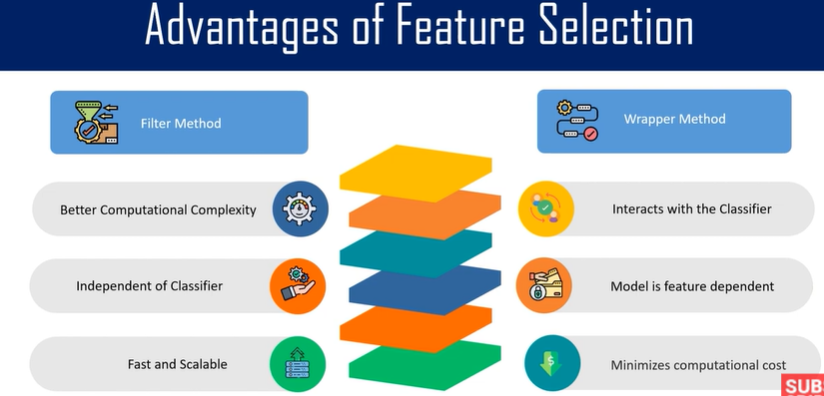

3. Embedded Method (Ridge Regression):

 - Ridge regression provided coefficients for all features, indicating their relative importance for prediction.
 - Higher coefficient values suggest greater influence on the target variable.
 - This method combines feature selection with model training.

## Overall:

Feature selection techniques can help improve model performance and interpretability by identifying the most relevant features.
Different techniques may yield slightly different results, highlighting the importance of exploring various methods.
The choice of the best technique depends on the specific dataset and the desired trade-off between accuracy and computational cost.
For the Pima Indians Diabetes dataset:

Features related to plasma glucose concentration (plas), glucose tolerance test (test), body mass index (mass), and age (age) appear to be consistently important for diabetes prediction across multiple techniques.
Further analysis, such as model training and evaluation with the selected features, is recommended to assess their impact on prediction accuracy.
